<a href="https://colab.research.google.com/github/mdaugherity/Numerical2024/blob/main/fits/Week_6_Advanced_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 351, Fall 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from scipy.optimize import brute
from scipy.optimize import differential_evolution

# Motivation - A Failed Gaussian Fit

Let's look at some simple Gaussian data points

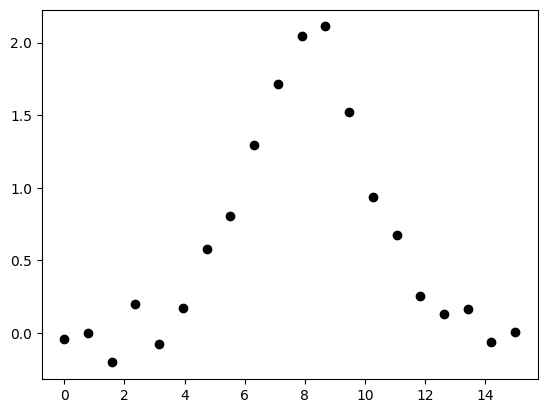

In [2]:
(xdata, ydata) = np.loadtxt('https://raw.githubusercontent.com/mdaugherity/Numerical2024/refs/heads/main/fits/g1.txt')
plt.plot(xdata, ydata,'ko')
plt.show()

A nice easy fit should do it!

In [3]:
def gausfit(x,a,mu,sig):
  return a*np.exp(-1.0* (x-mu)**2/(2*sig**2))

Best Pars:  [-0.39690569  1.36681492 -0.1825389 ]


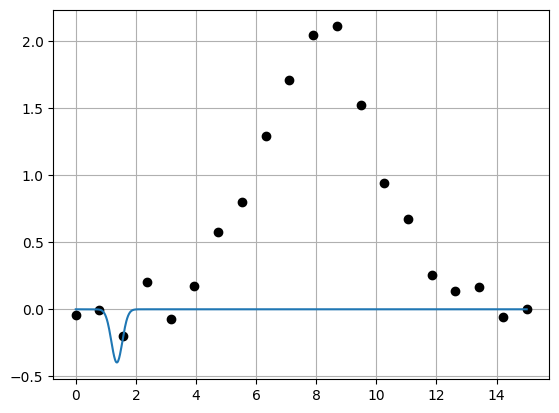

In [4]:
popt, pcov = curve_fit(gausfit, xdata, ydata)
print('Best Pars: ',popt)

xfit = np.linspace(0,15, num=1000)
yfit = gausfit(xfit, *popt)

plt.plot(xdata,ydata,'ko')
plt.plot(xfit,yfit,'-')
plt.grid()
plt.show()

Notice how there is no indication at all that the fit is absolutely terrible.  It simply started from the initial guess of $(1,1,1)$ and found the local minimum.

Let's get a way to measure error.  Evaluate the fit for given parameters, then sum over the squared residuals for all data points.

In [5]:
def gauserr(pars):
  """Use given pars to calculate the fit and sum the error over all data points"""
  return ((ydata - gausfit(xdata,*pars))**2).sum()

In [6]:
print('CURVE_FIT pars: ',popt)
print("CURVE_FIT ERROR:",gauserr(popt))

CURVE_FIT pars:  [-0.39690569  1.36681492 -0.1825389 ]
CURVE_FIT ERROR: 18.09211725887196


Here the error is a relative, arbitrary number.  If our points had proper error bars we could check the $\chi^2$ per degree of freedom.  For now at least we will just try to make the error go down.

#BRUTE FORCE

A glorious grid search!  Specify the ranges and the number of steps, then simply wait.

In [7]:
ranges = ((1,10), (1,10), (1,10))
popt = brute(gauserr, ranges)

print(popt)
print("BRUTE ERR", gauserr(popt))

[2.05754493 8.08990353 1.8869923 ]
BRUTE ERR 0.19751769545483408


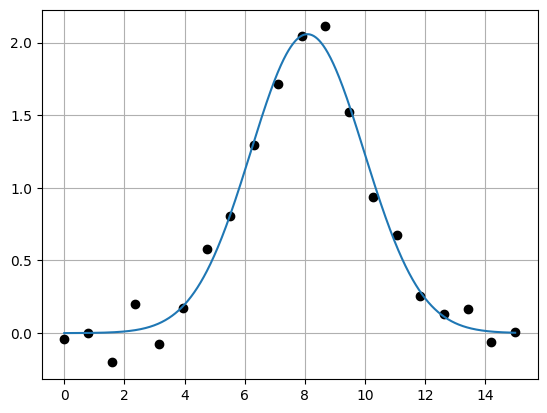

In [8]:
xfit = np.linspace(0,15, num=1000)
yfit = gausfit(xfit, *popt)

plt.plot(xdata,ydata,'ko')
plt.plot(xfit,yfit,'-')
plt.grid()
plt.show()

In [9]:
popt = brute(gauserr, ranges, Ns=10) # notice the time in varying Ns

# Differential Evolution

A very cool algorithm that can solve some hard problems surprisingly quickly.  The idea is to start with random guesses and then *evolve* new generations that home in on an answer.

In [10]:
bounds = [(1,10), (1,10), (1,10)]
res = differential_evolution(gauserr, bounds)
print(res)

             message: Optimization terminated successfully.
             success: True
                 fun: 0.19751769216309487
                   x: [ 2.058e+00  8.090e+00  1.887e+00]
                 nit: 22
                nfev: 1055
          population: [[ 2.057e+00  8.094e+00  1.886e+00]
                       [ 2.076e+00  8.082e+00  1.872e+00]
                       ...
                       [ 2.044e+00  8.092e+00  1.899e+00]
                       [ 2.057e+00  8.088e+00  1.892e+00]]
 population_energies: [ 1.975e-01  1.987e-01 ...  1.981e-01  1.976e-01]
                 jac: [ 4.968e-07 -8.327e-08 -1.166e-06]


In [11]:
print('Diff Ev error: ', gauserr(res.x))

Diff Ev error:  0.19751769216309487


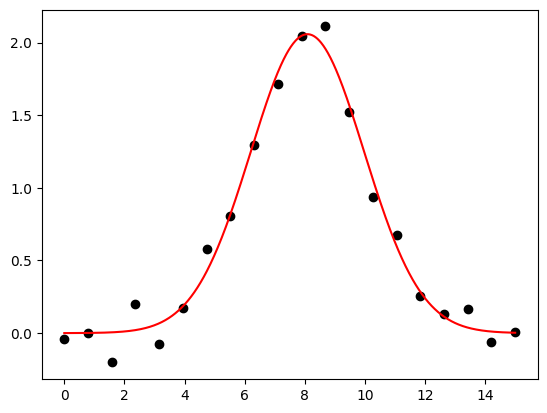

In [12]:
xfit = np.linspace(0,15, num=1000)
yfit = gausfit(xfit, *popt)

plt.plot(xdata,ydata,'ko')
plt.plot(xfit,yfit,'r-')
plt.show()

# Example 2 - Wave Packets

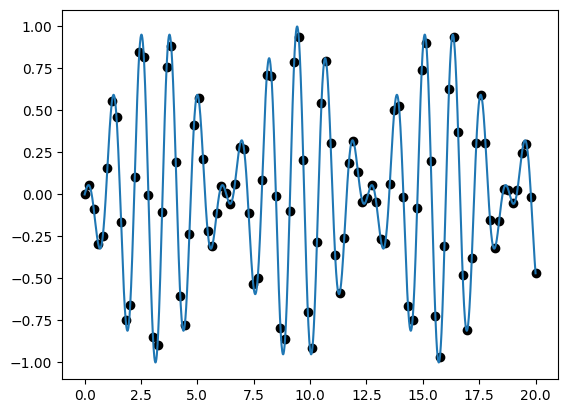

In [13]:
def wavefun(x,k1,k2):  # removed amp
  return np.cos(k1*x)*np.sin(k2*x)

ptrue = (5, 0.5)
XMAX = 20
xtrue = np.linspace(0,XMAX, num=2000)
ytrue = wavefun(xtrue, *ptrue)

N=100
xdata = np.linspace(0,20, num=N)
ydata = wavefun(xdata, *ptrue)

plt.plot(xdata,ydata,'ko')
plt.plot(xtrue,ytrue,'-')
plt.show()

In [14]:
def waveerr(x):  # x
  return ((ydata - wavefun(xdata,*x))**2).sum()

In [15]:
waveerr( ptrue)

0.0

In [16]:
p0 = (20,0.5)
popt, pcov = curve_fit(wavefun, xdata, ydata,p0)
print(popt)
print("CURVE_FIT ERROR:",waveerr(popt))

[20.06413349  0.51394334]
CURVE_FIT ERROR: 46.71929826808572


In [17]:
ranges = ((0,10), (0,10))
#popt = brute(waveerr, ranges, finish=None)
#popt = brute(waveerr, ranges)
popt, fval, grid, Jout = brute(waveerr, ranges, Ns=100,full_output=True)
print(popt, fval)
print("BRUTE ERR", waveerr(popt))

[4.99997873 0.49998461] 2.2380885102081124e-06
BRUTE ERR 2.2380885102081124e-06


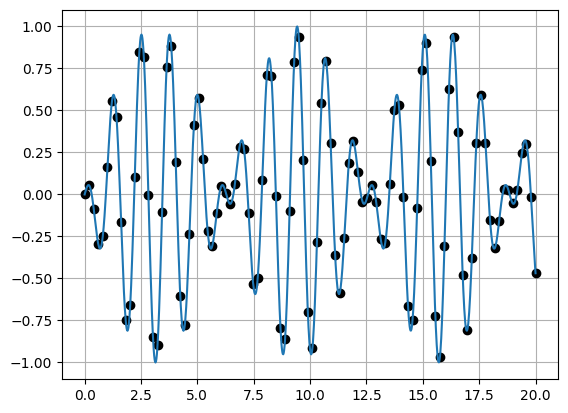

In [18]:
xfit = np.linspace(0,20, num=1000)
yfit = wavefun(xfit, *popt)

plt.plot(xdata,ydata,'ko')
plt.plot(xfit,yfit,'-')
plt.grid()
plt.show()

In [19]:
bounds = [(0,10), (0,10)]
differential_evolution(waveerr, bounds)

             message: Optimization terminated successfully.
             success: True
                 fun: 23.061618345023238
                   x: [ 5.356e+00  8.478e-01]
                 nit: 22
                nfev: 720
          population: [[ 5.356e+00  8.460e-01]
                       [ 5.356e+00  8.411e-01]
                       ...
                       [ 5.361e+00  8.435e-01]
                       [ 5.348e+00  8.474e-01]]
 population_energies: [ 2.306e+01  2.315e+01 ...  2.319e+01  2.317e+01]
                 jac: [ 3.233e-05  2.434e-04]

Once again the global optimizers have succeeded where curve_fit initially failed.